In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.display.max_columns = 300

In [2]:
df = pd.read_csv('data/composed/mira_all.csv')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (877) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# data_2015 = df[df.START_TIMESTAMP >= '2015-01-01 00:00:00'][df.START_TIMESTAMP < '2016-01-01 00:00:00']
data_2016 = df[df.START_TIMESTAMP >= '2016-01-01 00:00:00'][df.START_TIMESTAMP < '2017-01-01 00:00:00']
data_2017 = df[df.START_TIMESTAMP >= '2017-01-01 00:00:00'][df.START_TIMESTAMP < '2018-01-01 00:00:00']
data_2018 = df[df.START_TIMESTAMP >= '2018-01-01 00:00:00'][df.START_TIMESTAMP < '2019-01-01 00:00:00']
data_2019 = df[df.START_TIMESTAMP >= '2019-01-01 00:00:00'][df.START_TIMESTAMP < '2020-01-01 00:00:00']

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [4]:
averageDict = {'year': ['2016', '2017', '2018', '2019'],# ['2015', '2016', '2017', '2018', '2019'],
              'job_id_count': [
#                   data_2015.zero_batchJobId.unique().size,
                  data_2016.zero_batchJobId.unique().size,
                  data_2017.zero_batchJobId.unique().size,
                  data_2018.zero_batchJobId.unique().size,
                  data_2019.zero_batchJobId.unique().size,
              ],
              'task_id_count': [
#                   data_2015.zero_csJobId.unique().size,
                  data_2016.zero_csJobId.unique().size,
                  data_2017.zero_csJobId.unique().size,
                  data_2018.zero_csJobId.unique().size,
                  data_2019.zero_csJobId.unique().size
              ]}
averageData = pd.DataFrame(data=averageDict)
averageData['tasks_per_job'] = averageData['task_id_count'] / averageData['job_id_count']
print(averageData)

   job_id_count  task_id_count  year  tasks_per_job
0         16165          82293  2016       5.090813
1          7737          47033  2017       6.078971
2         12743         127184  2018       9.980695
3          2450         113983  2019      46.523673


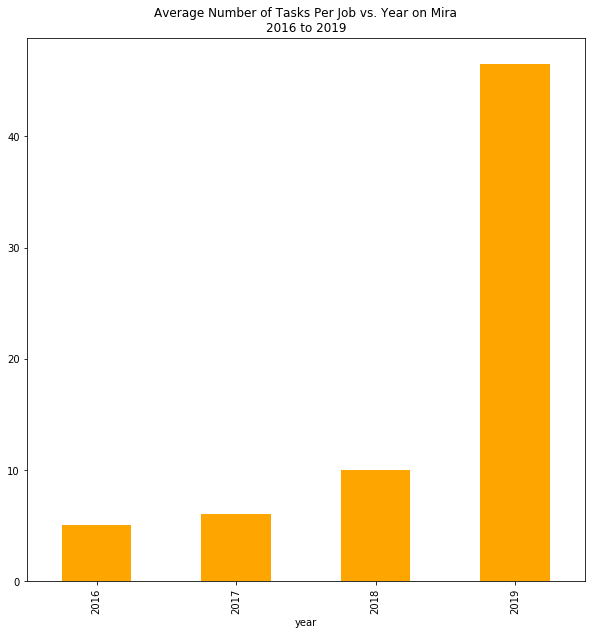

In [5]:
%matplotlib inline
averageData.plot(x="year", 
                 y="tasks_per_job", 
                 kind='bar', 
#                  title="Average Number of Tasks Per Job vs. Year on Mira\n2015 to 2019", 
                 title="Average Number of Tasks Per Job vs. Year on Mira\n2016 to 2019", 
                 figsize=(10,10), 
                 color='orange', 
                 legend=False)
plt.savefig('figure/avg_task_per_job.png')

16165.0
7737.0
12743.0
2450.0
   Traditional HPC  Workflow  year
0         0.876028  0.123972  2016
1         0.827323  0.172677  2017
2         0.795809  0.204191  2018
3         0.756735  0.243265  2019


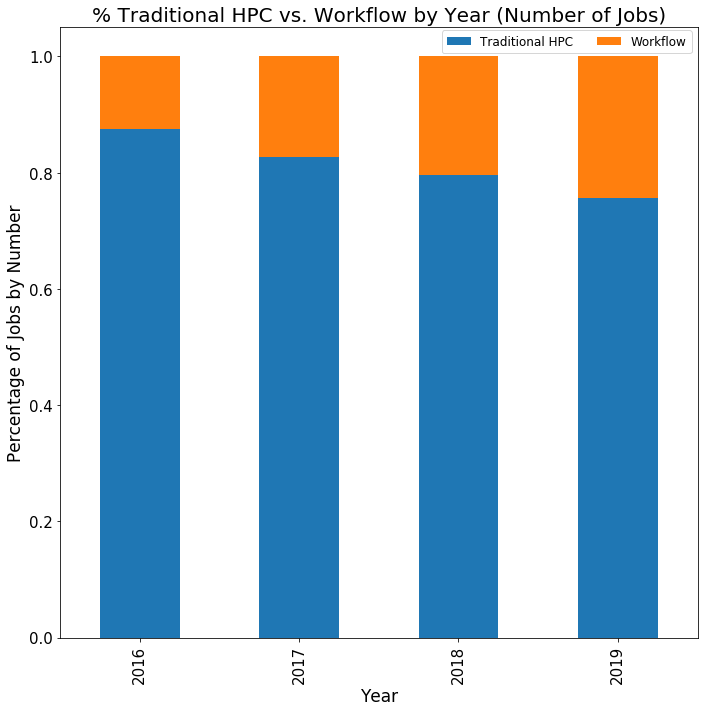

In [60]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
years = [data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']
yearstrings = ['2016', '2017', '2018', '2019']
# y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
y = {'year': yearstrings, 'Traditional HPC': np.zeros(4, dtype=float), 'Workflow': np.zeros(4, dtype=float)}
job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
for i in range(0, 4):
    one = 0.0
    many = 0.0
    for job in years[i].zero_batchJobId.unique():
        tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
        if tasks == 1:
            one += 1.0
        else:
            many += 1.0
    total = one + many
    job_task_data.iat[i, 0] = one / total
    job_task_data.iat[i, 1] = many / total
    print(total)
plt.rc('axes', titlesize=20)
plt.rc('legend', fontsize=12)
ax = job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
                   title='% Traditional HPC vs. Workflow by Year (Number of Jobs)')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('Percentage of Jobs by Number', fontsize=17)
ax.legend(bbox_to_anchor=(1, 1.005), ncol=2)
plt.tight_layout()
# plt.subplots_adjust(pad=2)
print(job_task_data)
plt.savefig('figure/hpc_usage_num.png')

In [41]:
years = [data_2015, data_2016, data_2017, data_2018, data_2019]
yearstrings = ['2015', '2016', '2017', '2018', '2019']
y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
job_task_data = pd.DataFrame(data=y)

for i in range(0, 5):
    one = 0.0
    many = 0.0
    for job in years[i].zero_batchJobId.unique():
        tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
        if tasks == 1:
            one += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
        else:
            many += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
    total = one + many
    job_task_data.iat[i, 1] = one / total
    job_task_data.iat[i, 2] = many / total
job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
                   title='% Traditional HPC vs. Workflow by Year (Core Hours Used)')
print(job_task_data)
plt.savefig('figure/hpc_usage_ch.png')

KeyboardInterrupt: 

   year  Traditional HPC  Workflow
0  2015         0.020936  0.002440
1  2016         0.124933  0.139715
2  2017         0.103036  0.112023
3  2018         0.128217  0.158001
4  2019         0.045332  0.053830


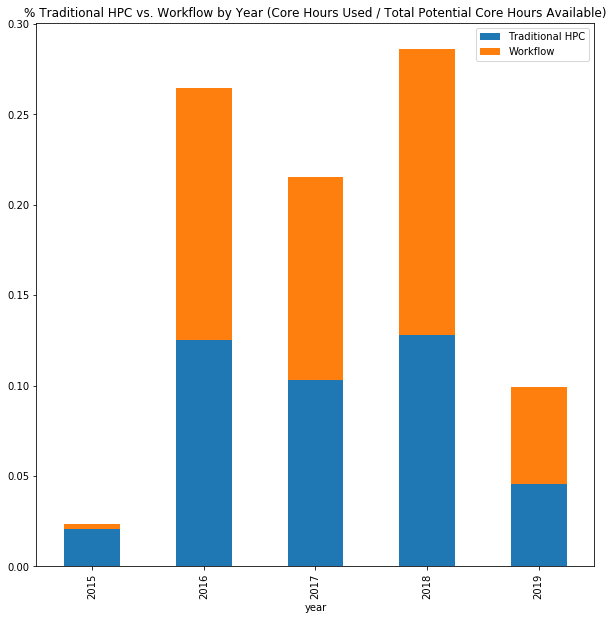

In [52]:
years = [data_2015, data_2016, data_2017, data_2018, data_2019]
yearstrings = ['2015', '2016', '2017', '2018', '2019']
y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
job_task_data = pd.DataFrame(data=y)

for i in range(0, 5):
    one = 0.0
    many = 0.0
    for job in years[i].zero_batchJobId.unique():
        tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
        if tasks == 1:
            one += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
        else:
            many += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
    total = one + many
    job_task_data.iat[i, 1] = one / 6870269952
    job_task_data.iat[i, 2] = many / 6870269952
job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
                   title='% Traditional HPC vs. Workflow by Year (Core Hours Used / Total Potential Core Hours Available)')
print(job_task_data)
plt.savefig('figure/hpc_usage_ch.png')

   year  Traditional HPC  Workflow
0  2015         0.894812  0.105188
1  2016         0.470236  0.529764
2  2017         0.478621  0.521379
3  2018         0.446995  0.553005
4  2019         0.456016  0.543984


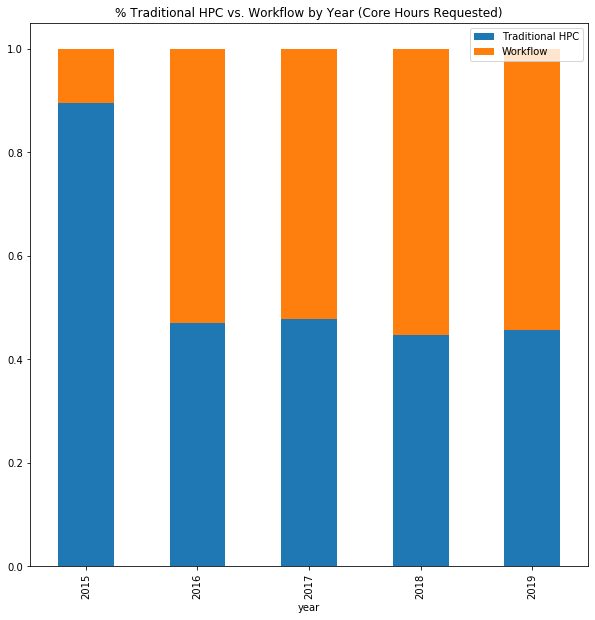

In [35]:
years = [data_2015, data_2016, data_2017, data_2018, data_2019]
yearstrings = ['2015', '2016', '2017', '2018', '2019']
y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=float), 'Workflow': np.zeros(5, dtype=float)}
job_task_data = pd.DataFrame(data=y)

for i in range(0, 5):
    one = 0.0
    many = 0.0
    for job in years[i].zero_batchJobId.unique():
        tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
        if tasks == 1:
            one += years[i][years[i].zero_batchJobId == job].iloc[0].REQUESTED_CORE_HOURS
        else:
            many += years[i][years[i].zero_batchJobId == job].iloc[0].REQUESTED_CORE_HOURS
    total = one + many
    job_task_data.iat[i, 1] = one / total
    job_task_data.iat[i, 2] = many / total
job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
                   title='% Traditional HPC vs. Workflow by Year (Core Hours Requested)')
print(job_task_data)

In [26]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019 Extrapolated']
# y = {'year': yearstrings, 'Traditional HPC': np.zeros(5, dtype=int), 'Workflow': np.zeros(5, dtype=int)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0
#     many = 0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#         else:
#             many += years[i][years[i].zero_batchJobId == job].iloc[0].USED_CORE_HOURS
#     if (i < 4):
#         job_task_data.iat[i, 1] = one
#     else:
#         job_task_data.iat[i, 1] = one * 3
#     if (i < 4):
#         job_task_data.iat[i, 2] = many
#     else:
#         job_task_data.iat[i,2] = many * 3
# print(job_task_data)
# job_task_data.plot(kind='bar', x='year', y=['Traditional HPC', 'Workflow'], figsize=(10,10), stacked=True,
#                    title='% Traditional HPC vs. Workflow by Year (Core Hours) -- 2019 Extrapolated')

In [10]:
# years = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']
# y = {'year': yearstrings, 
#      'one': np.zeros(5, dtype=int), 
#      'two': np.zeros(5, dtype=int), 
#      'three': np.zeros(5, dtype=int), 
#      'four': np.zeros(5, dtype=int), 
#      'many': np.zeros(5, dtype=int)}
# job_task_data = pd.DataFrame(data=y)

# for i in range(0, 5):
#     one = 0
#     two = 0
#     three = 0
#     four = 0
#     many = 0
#     for job in years[i].zero_batchJobId.unique():
#         tasks = years[i][years[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         if tasks == 1:
#             one += 1
#         elif tasks == 2:
#             two += 1
#         elif tasks == 3:
#             three +=1
#         elif tasks == 4:
#             four += 1
#         else:
#             many += 1
#     job_task_data.iat[i, 0] = four
#     job_task_data.iat[i, 1] = many
#     job_task_data.iat[i, 2] = one
#     job_task_data.iat[i, 3] = three
#     job_task_data.iat[i, 4] = two
# job_task_data.plot(kind='bar', x='year', y=['one', 'two', 'three', 'four', 'many'], figsize=(15,15))
# print(job_task_data)

In [30]:
# yearsets = [data_2015, data_2016, data_2017, data_2018, data_2019]
# yearstrings = ['2015', '2016', '2017', '2018', '2019']

# y = {'years': [], 'jobs': [], 'tasks': []}
# for i in range(0, 5):
#     for job in yearsets[i].zero_batchJobId.unique():
#         tasks = yearsets[i][yearsets[i]['zero_batchJobId'] == job].zero_csJobId.unique().size
#         y['years'].append(yearstrings[i])
#         y['jobs'].append(job)
#         y['tasks'].append(tasks)

# job_task_data = pd.DataFrame(data=y)
# hist = job_task_data.hist(column='tasks', by='years', bins=range(2,job_task_data.tasks.max()), figsize=(20,20));